# import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
correl = df.corr()['quality'].sort_values(ascending=False)
print(correl)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

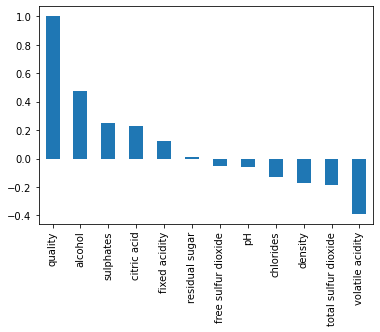

In [8]:
correl.plot(kind='bar')

<AxesSubplot:>

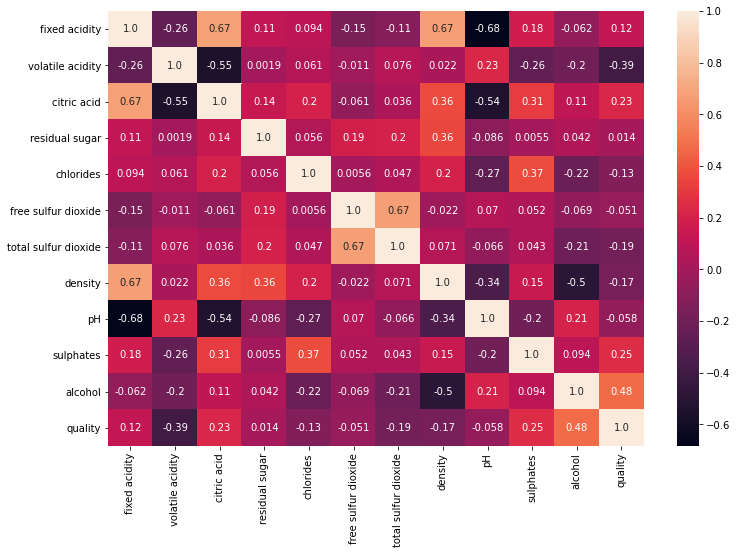

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2')

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

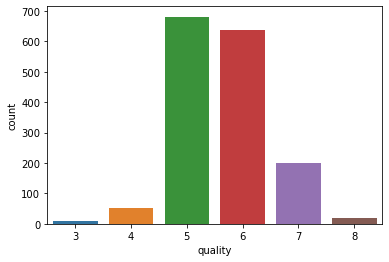

In [12]:
sns.countplot(df['quality'])

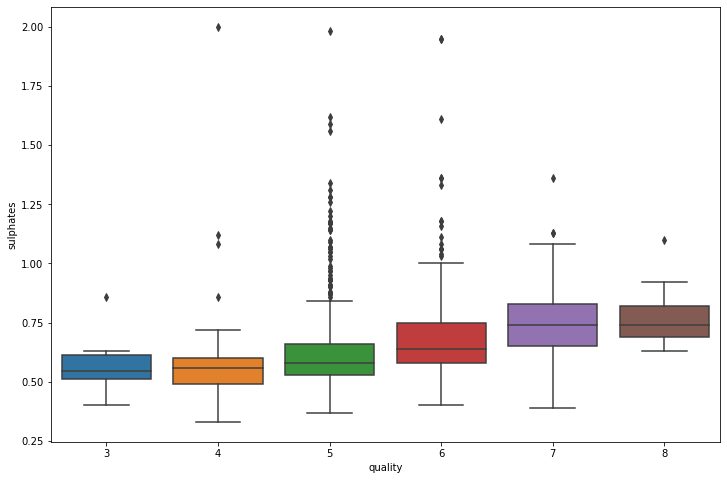

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='quality',y='sulphates', data=df)
plt.title="Sulphates in Wines"

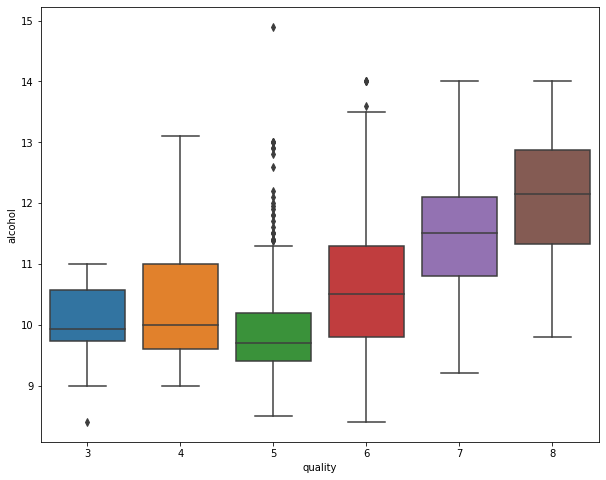

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='quality',y='alcohol', data=df)
plt.title="alcohol in Wines"

In [17]:
df_quality = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [18]:
corr1 = df_quality.corr()['quality'].sort_values(ascending=False)
print(corr1)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


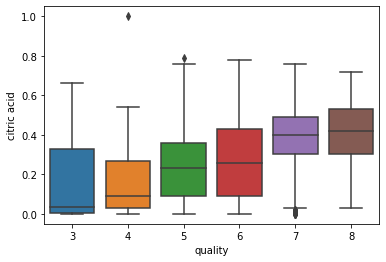

In [20]:
sns.boxplot(x='quality',y='citric acid', data=df)
plt.title="Citric Acid in Wines"

In [23]:
x = df.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
y = df.iloc[:,11]


this is imbalance data set we have to do first convert in to balance data set

In [28]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=2, n=681 (16.667%)
Class=3, n=681 (16.667%)
Class=4, n=681 (16.667%)
Class=1, n=681 (16.667%)
Class=5, n=681 (16.667%)
Class=0, n=681 (16.667%)


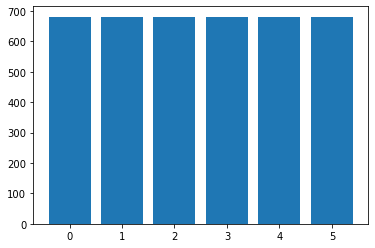

In [32]:
data = df.values
x, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()